# Náhodné lesy

## 1. Import knižníc

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Pôvodné dáta

### a) bez redukcie

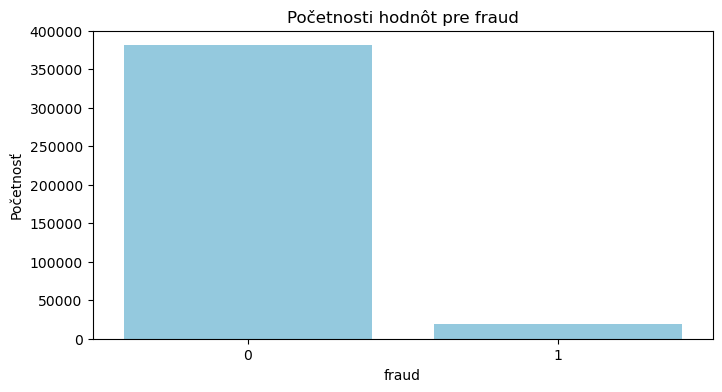

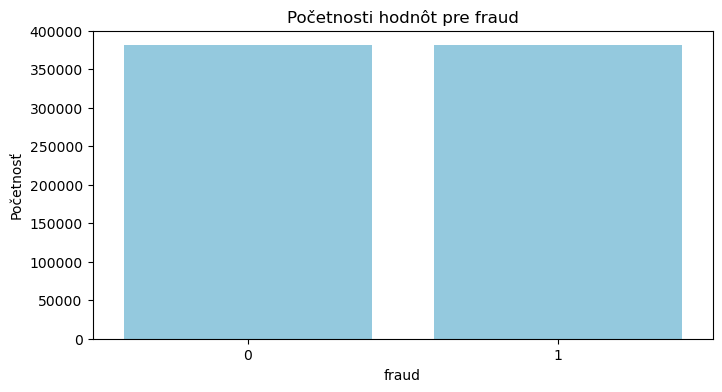

Kontingenčná tabuľka:
col_0      0     1
fraud             
0      94928   226
1        143  4703
Report:
              precision    recall  f1-score   support

           0     0.9985    0.9976    0.9981     95154
           1     0.9541    0.9705    0.9623      4846

    accuracy                         0.9963    100000
   macro avg     0.9763    0.9841    0.9802    100000
weighted avg     0.9963    0.9963    0.9963    100000

Špecificita: 0.9976


In [10]:
origin = pd.read_csv("../Priprava_dat/origin.csv", index_col=0)
X = origin.drop('fraud', axis=1)
y = origin[ 'fraud']

nadvzrk = RandomOverSampler(sampling_strategy='auto', random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
pocetnost = y_train.value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=pocetnost.index, y=pocetnost.values, color = 'skyblue')
plt.xlabel('fraud')
plt.ylabel('Početnosť')
plt.title(f'Početnosti hodnôt pre fraud')
plt.show()

X_train_resampled, y_train_resampled = nadvzrk.fit_resample(X_train, y_train)
pocetnost = y_train_resampled.value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=pocetnost.index, y=pocetnost.values, color = 'skyblue')
plt.xlabel('fraud')
plt.ylabel('Početnosť')
plt.title(f'Početnosti hodnôt pre fraud')
plt.show()

model1 = RandomForestClassifier(random_state=0)
model1.fit(X_train_resampled, y_train_resampled)

predikovane = model1.predict(X_test)

print("Kontingenčná tabuľka:")
print(pd.crosstab(y_test, predikovane))
print("Report:")
print(classification_report(y_test, predikovane, digits=4))

tn, fp, fn, tp = confusion_matrix(y_test, predikovane).ravel()
speci = tn / (tn + fp)
print("Špecificita:", round(speci, 4))

### b) s redukciou

In [3]:
origin_red = pd.read_csv("../Priprava_dat/origin_red.csv", index_col=0)
X = origin_red.drop('fraud', axis=1)
y = origin_red[ 'fraud']

nadvzrk = RandomOverSampler(sampling_strategy='auto', random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_train_resampled, y_train_resampled = nadvzrk.fit_resample(X_train, y_train)

model2 = RandomForestClassifier(random_state=0)
model2.fit(X_train_resampled, y_train_resampled)

predikovane = model2.predict(X_test)

print("Kontingenčná tabuľka:")
print(pd.crosstab(y_test, predikovane))
print("Report:")
print(classification_report(y_test, predikovane, digits=4))

tn, fp, fn, tp = confusion_matrix(y_test, predikovane).ravel()
speci = tn / (tn + fp)
print("Špecificita:", round(speci, 4))

Kontingenčná tabuľka:
col_0      0     1
fraud             
0      94907   247
1        123  4723
Report:
              precision    recall  f1-score   support

           0     0.9987    0.9974    0.9981     95154
           1     0.9503    0.9746    0.9623      4846

    accuracy                         0.9963    100000
   macro avg     0.9745    0.9860    0.9802    100000
weighted avg     0.9964    0.9963    0.9963    100000

Špecificita: 0.9974


## 3. Normalizované dáta

### a) bez redukcie

In [4]:
norm = pd.read_csv("../Priprava_dat/norm.csv", index_col=0)
X = norm[['trustLevel', 'totalScanTimeInSeconds','grandTotal', 'lineItemVoids', 'scansWithoutRegistration','quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']]
y = norm[ 'fraud']

nadvzrk = RandomOverSampler(sampling_strategy='auto', random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_train_resampled, y_train_resampled = nadvzrk.fit_resample(X_train, y_train)

model3 = RandomForestClassifier(random_state=0)
model3.fit(X_train_resampled, y_train_resampled)

predikovane = model3.predict(X_test)

print("Kontingenčná tabuľka:")
print(pd.crosstab(y_test, predikovane))
print("Report:")
print(classification_report(y_test, predikovane, digits=4))

tn, fp, fn, tp = confusion_matrix(y_test, predikovane).ravel()
speci = tn / (tn + fp)
print("Špecificita:", round(speci, 4))

Kontingenčná tabuľka:
col_0    0.0   1.0
fraud             
0.0    68200   166
1.0       85  4220
Report:
              precision    recall  f1-score   support

         0.0     0.9988    0.9976    0.9982     68366
         1.0     0.9622    0.9803    0.9711      4305

    accuracy                         0.9965     72671
   macro avg     0.9805    0.9889    0.9846     72671
weighted avg     0.9966    0.9965    0.9966     72671

Špecificita: 0.9976


### b) s redukciou

In [5]:
norm_red = pd.read_csv("../Priprava_dat/norm_red.csv", index_col=0)
X = norm_red.drop('fraud', axis=1)
y = norm_red[ 'fraud']

nadvzrk = RandomOverSampler(sampling_strategy='auto', random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_train_resampled, y_train_resampled = nadvzrk.fit_resample(X_train, y_train)

model4 = RandomForestClassifier(random_state=0)
model4.fit(X_train_resampled, y_train_resampled)

predikovane = model4.predict(X_test)

print("Kontingenčná tabuľka:")
print(pd.crosstab(y_test, predikovane))
print("Report:")
print(classification_report(y_test, predikovane, digits=4))

tn, fp, fn, tp = confusion_matrix(y_test, predikovane).ravel()
speci = tn / (tn + fp)
print("Špecificita:", round(speci, 4))

Kontingenčná tabuľka:
col_0    0.0   1.0
fraud             
0.0    68201   165
1.0       86  4219
Report:
              precision    recall  f1-score   support

         0.0     0.9987    0.9976    0.9982     68366
         1.0     0.9624    0.9800    0.9711      4305

    accuracy                         0.9965     72671
   macro avg     0.9806    0.9888    0.9846     72671
weighted avg     0.9966    0.9965    0.9966     72671

Špecificita: 0.9976


## 4. Diskretizované dáta

### a) bez redukcie

In [6]:
dis = pd.read_csv("../Priprava_dat/dis.csv", index_col=0)
X = dis[['trustLevel', 'totalScanTimeInSeconds','grandTotal', 'lineItemVoids', 'scansWithoutRegistration','quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']]
y = dis[ 'fraud']

nadvzrk = RandomOverSampler(sampling_strategy='auto', random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_train_resampled, y_train_resampled = nadvzrk.fit_resample(X_train, y_train)

model5 = RandomForestClassifier(random_state=0)
model5.fit(X_train_resampled, y_train_resampled)

predikovane = model5.predict(X_test)

print("Kontingenčná tabuľka:")
print(pd.crosstab(y_test, predikovane))
print("Report:")
print(classification_report(y_test, predikovane, digits=4))

tn, fp, fn, tp = confusion_matrix(y_test, predikovane).ravel()
speci = tn / (tn + fp)
print("Špecificita:", round(speci, 4))

Kontingenčná tabuľka:
col_0    0.0   1.0
fraud             
0.0    67551   815
1.0      520  3785
Report:
              precision    recall  f1-score   support

         0.0     0.9924    0.9881    0.9902     68366
         1.0     0.8228    0.8792    0.8501      4305

    accuracy                         0.9816     72671
   macro avg     0.9076    0.9336    0.9201     72671
weighted avg     0.9823    0.9816    0.9819     72671

Špecificita: 0.9881


### b) s redukciou

In [7]:
dis_red = pd.read_csv("../Priprava_dat/dis_red.csv", index_col=0)
X = dis_red.drop('fraud', axis=1)
y = dis_red[ 'fraud']

nadvzrk = RandomOverSampler(sampling_strategy='auto', random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_train_resampled, y_train_resampled = nadvzrk.fit_resample(X_train, y_train)

model6 = RandomForestClassifier(random_state=0)
model6.fit(X_train_resampled, y_train_resampled)

predikovane = model6.predict(X_test)

print("Kontingenčná tabuľka:")
print(pd.crosstab(y_test, predikovane))
print("Report:")
print(classification_report(y_test, predikovane, digits=4))

tn, fp, fn, tp = confusion_matrix(y_test, predikovane).ravel()
speci = tn / (tn + fp)
print("Špecificita:", round(speci, 4))

Kontingenčná tabuľka:
col_0    0.0   1.0
fraud             
0.0    67302  1064
1.0      450  3855
Report:
              precision    recall  f1-score   support

         0.0     0.9934    0.9844    0.9889     68366
         1.0     0.7837    0.8955    0.8359      4305

    accuracy                         0.9792     72671
   macro avg     0.8885    0.9400    0.9124     72671
weighted avg     0.9809    0.9792    0.9798     72671

Špecificita: 0.9844
